In [294]:
#to import the necessary libraries

import numpy as np  #to check if numpy is properly installed or not - python library with support for algorithms, arrays etc
import matplotlib.pyplot as plt  #to plot the graphs
import scipy.io as sc  #open source python library used for mathematical and scientific problems - built on numpy extension
import pandas as pd
import seaborn as sns  #to plot the graphs

In [295]:
data_input = sc.loadmat('AllSamples.mat')  #accessing the entire input data
n_data = data_input['AllSamples']          #copying 'All Samples' data to n_data

dataframe = pd.DataFrame(n_data, columns = ['X', 'Y']) #to display the input x,y using dataframe approach - tabular approach
dataframe                                              

,X,Y
0,2.059249,7.205988
1,8.875781,8.960924
2,8.007064,2.775320
3,5.017288,3.763120
4,6.390562,5.179565
...,...,...
295,4.783632,7.106443
296,2.646830,6.323443
297,4.322397,0.330889
298,2.364303,1.052097


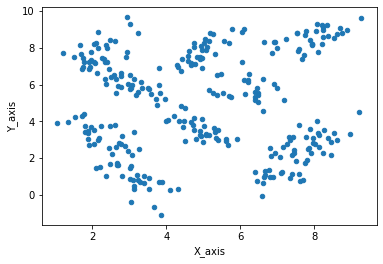

In [296]:
#Scatter plot of input clusters

data = {'X_axis': dataframe['X'],
        'Y_axis': dataframe['Y']
       }
  
df = pd.DataFrame(data,columns=['X_axis','Y_axis'])
df.plot(x ='X_axis', y='Y_axis', kind = 'scatter')    
plt.show()


In [297]:
#method to calculate random centroids/initialization of centroids for clusters
"""Strategy 1: randomly choosing the initial centers from the given samples
Random Initializations - Random data points are selected as dataset and used as initial centroids"""

def random_centroid_assign(new_data, k):
    random_point_idx = [np.random.randint(len(new_data)) for i in range(k)]    #random idx for corresponding samples chosen as centroids 
    random_centroids = []
    for i in random_point_idx:
        random_centroids.append(new_data[i])    #assigning the input data with corresponding random_idx to the array centroids
    return random_centroids                     

In [298]:
#function to assign/group the data points to corresponding clusters based on centroids
"""Grouping of Clusters - grouping the data points into clusters by considering the index at which 
the distance between data points and all the k centroids is smaller and its corresponding centroid 
is selected"""

def set_cluster(new_data, start_centroids, k):
    cluster_points = []
    for i in range(len(new_data)):
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(np.subtract(new_data[i], start_centroids[j])))
        #assigning idx to sample with least distance
        dist_idx = np.argmin(distance)   
        cluster_points.append(dist_idx)                   
    return np.asarray(cluster_points)                

In [299]:
#function to update the centroids
"""Updating the new centroids - by using clusters from previous centroid and taking mean of data points"""


def centroid_updation(new_data, clusters_val, k):
    centroid_point = []
    for i in range(k):
        arr_bkp = []
        for j in range(len(new_data)):
            if clusters_val[j]==i:
                arr_bkp.append(new_data[j])           
        centroid_point.append(np.mean(np.asarray(arr_bkp), axis = 0))   
    return np.asarray(centroid_point)

In [300]:
#function to calculate the difference between centroids
"""previous centroid and next centroid distance difference"""

def distance_difference(prior_c, nxt_c):
    change = 0
    for i in range(len(prior_c)):
        change+=np.linalg.norm(np.subtract(prior_c[i], nxt_c[i]))
    return change

In [301]:
#function to plot the clusters
"""Scatter plot - Diagram where each value in data set is represented by a dot
ten different colors are used to distinguish between different clusters
initial centroid represented as +
final centroid represented as *"""


def cluster_display(new_data, cluster_ip, centroid_ip, start_centroids, centroid_trace = True, start_centroid_disp = True, disp_plots = True):
    colors_val = {0:'red', 1:'blue', 2:'green', 3:'coral', 4:'cyan', 5:'lime', 6:'orange', 7:'black', 8:'grey', 9:'pink'} 
    figure,axes = plt.subplots(figsize=(7.5,6)); 
    #representing every cluster point 
    for i in range(len(cluster_ip)):
        axes.scatter(new_data[i][0], new_data[i][1], color = colors_val[cluster_ip[i]])
    
    #representing the initial and final centroids
    for j in range(len(centroid_ip)):
        axes.scatter(centroid_ip[j][0], centroid_ip[j][1], marker = '*', s=250, color=colors_val[j])
        if start_centroid_disp == True:
            axes.scatter(start_centroids[j][0], start_centroids[j][1], marker = '+', s=350, color = colors_val[j])
    
    axes.set_xlabel("X_axis")
    axes.set_ylabel("Y_axis")
    axes.set_title("k means clustering")
    if disp_plots == True:
        plt.show()

In [302]:
#main kmeans clustering function call with cluster and centroid points as return value
"""K-means clustering algorithm - identifies k number of centroids 
and then allocates every data point to the nearest cluster,
while keeping the centroids as small as possible"""


def kmeans_alg(new_data, k, disp_grp='all', disp_plots=True):
    #calculating the initial centroid and grouping of clusters
    prior_cent = random_centroid_assign(new_data, k)
    cluster_pnt = set_cluster(new_data, prior_cent, k)
    #assuming the initial difference between centroids as 100
    change = 100 
    start_centroid = prior_cent; #starting initial centroid value
    
   
    """updating the centroids with minute difference > 0.01"""
    while change > 0.01:
        cluster_pnt = set_cluster(new_data, prior_cent, k)
        if disp_grp == 'all' and disp_plots:
            cluster_display(new_data, cluster_pnt, prior_cent, start_centroid, False, False, disp_plots = disp_plots)
            centroid_trace = False
            start_centroid_disp = False
        new_cent = centroid_updation(new_data, cluster_pnt, k)
        change = distance_difference(prior_cent, new_cent)
        prior_cent = new_cent
        
    #plotting the clusters     
    if disp_plots:
        cluster_display(new_data, cluster_pnt, prior_cent, start_centroid, centroid_trace = True, start_centroid_disp = True, disp_plots = True)
    return cluster_pnt, prior_cent

In [303]:
#the main function 2 same as main function 1 without displaying clusters  
#as it is not used for WCSS calculation

def kmeans_alg_2(new_data, k, disp_grp='all', disp_plots=True):
    prior_cent = random_centroid_assign(new_data, k)
    cluster_pnt = set_cluster(new_data, prior_cent, k)
    change = 100 
    start_centroid = prior_cent; #starting initial centroid value
    
    while change > 0.01:
        cluster_pnt = set_cluster(new_data, prior_cent, k)
        if disp_grp == 'all' and disp_plots:
#            cluster_display(new_data, cluster_pnt, prior_cent, start_centroid, False, False, disp_plots = disp_plots)
            centroid_trace = False
            start_centroid_disp = False
        new_cent = centroid_updation(new_data, cluster_pnt, k)
        change = distance_difference(prior_cent, new_cent)
        prior_cent = new_cent
    
    return cluster_pnt, prior_cent

Enter the value of k between 2-10:2


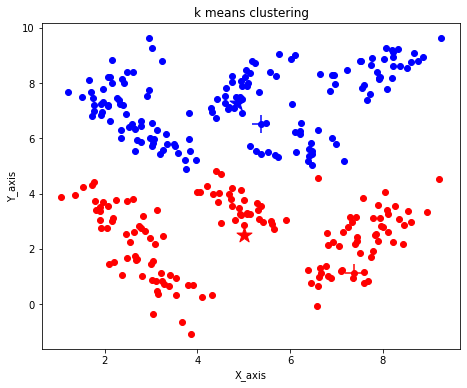

In [304]:
#calculating the centroid and the corresponding clusters for given input dataset
"""the value of k determines the number of clusters 
the ouput plot shows the different clusters based on k value with their initial(+) and final centroids(*),
which determines the improvement in centroid position based on the close approximity of 
data points to centroids of clusters"""

k = int(input("Enter the value of k between 2-10:"))
cluster, centroid = kmeans_alg(n_data, k, disp_grp='output')


In [305]:
#function to calculate the cost 
"""Sum of squared distance between each point and a centroid in a cluster"""

def cost_calc(x_ip, centroids_pnt, cluster):
    wcss = 0
    for i, val in enumerate(x_ip):
        wcss += np.sqrt((centroids_pnt[int(cluster[i]), 0]-val[0])**2 +(centroids_pnt[int(cluster[i]), 1]-val[1])**2)
    return wcss

In [306]:
#calculating the cost for a given range of (2,10) 

cost_list = []
for k in range(2, 11):
    clusterrrr, centroidddd = kmeans_alg_2(n_data, k)
    # WCSS (Within cluster sum of square)
    cost_val = cost_calc(n_data, centroidddd, clusterrrr)
    cost_list.append(cost_val)


In [307]:
#list of cost values for given range
cost_list

[704.0045894890274,
 578.9151004150799,
 451.48078440188505,
 405.2555970353138,
 332.78804388579726,
 309.82626776318466,
 270.95686382381024,
 243.96507873076487,
 221.51001386483688]

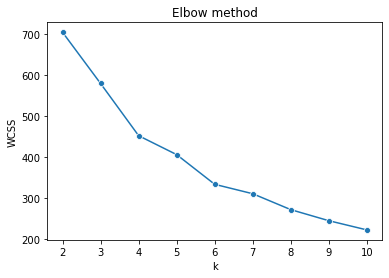

In [308]:
#Plotting the objective function vs k value (Elbow method) 
"""objective function/wcss - the sum of squared distance between each point and the centroid in a cluster
For each value of K, calculating WCSS (Within-Cluster Sum of Square)
plot of WCSS with the K value looks like an Elbow 
As the number of clusters increases, the WCSS value will start to decrease
The K value corresponding to elbow point is the optimal K value or an optimal number of clusters"""

sns.lineplot(x=range(2,11), y=cost_list, marker='o')
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

Enter the value of k between 2-10:2


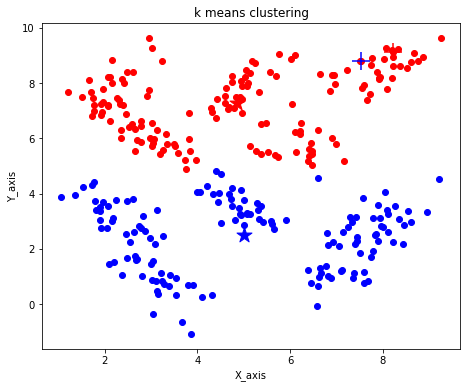

In [309]:
#2nd initialization
k = int(input("Enter the value of k between 2-10:"))
cluster, centroid = kmeans_alg(n_data, k, disp_grp='output')


In [310]:
#calculating the cost for a given range of (2,10)

cost_list = []
for k in range(2, 11):
    clusterrrr, centroidddd = kmeans_alg_2(n_data, k)
    # WCSS (Within cluster sum of square)
    cost_val = cost_calc(n_data, centroidddd, clusterrrr)
    cost_list.append(cost_val)


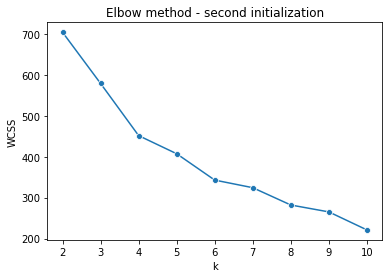

In [311]:
#plotting of objective function vs k with second initialization

sns.lineplot(x=range(2,11), y=cost_list, marker='o')
plt.title('Elbow method - second initialization')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()